In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest , chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('resampled_dataset_with_timestamps.csv')
df.head(5)

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,timestamp
0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-01-04 00:00:00
1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-01-04 00:01:00
2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,2018-01-04 00:02:00
3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,2018-01-04 00:03:00
4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,2018-01-04 00:04:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59858 entries, 0 to 59857
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sensor_00       59858 non-null  float64
 1   sensor_01       59858 non-null  float64
 2   sensor_02       59858 non-null  float64
 3   sensor_03       59858 non-null  float64
 4   sensor_04       59858 non-null  float64
 5   sensor_05       59858 non-null  float64
 6   sensor_06       59858 non-null  float64
 7   sensor_07       59858 non-null  float64
 8   sensor_08       59858 non-null  float64
 9   sensor_09       59858 non-null  float64
 10  sensor_10       59858 non-null  float64
 11  sensor_11       59858 non-null  float64
 12  sensor_12       59858 non-null  float64
 13  sensor_13       59858 non-null  float64
 14  sensor_14       59858 non-null  float64
 15  sensor_16       59858 non-null  float64
 16  sensor_17       59858 non-null  float64
 17  sensor_18       59858 non-null 

In [4]:
## Changing the datatype 

df['timestamp'] = pd.to_datetime(df['timestamp'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59858 entries, 0 to 59857
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sensor_00       59858 non-null  float64       
 1   sensor_01       59858 non-null  float64       
 2   sensor_02       59858 non-null  float64       
 3   sensor_03       59858 non-null  float64       
 4   sensor_04       59858 non-null  float64       
 5   sensor_05       59858 non-null  float64       
 6   sensor_06       59858 non-null  float64       
 7   sensor_07       59858 non-null  float64       
 8   sensor_08       59858 non-null  float64       
 9   sensor_09       59858 non-null  float64       
 10  sensor_10       59858 non-null  float64       
 11  sensor_11       59858 non-null  float64       
 12  sensor_12       59858 non-null  float64       
 13  sensor_13       59858 non-null  float64       
 14  sensor_14       59858 non-null  float64       
 15  se

In [5]:
# Function to change the year
def update_year(dt, new_year):
    return dt.replace(year=new_year)

# Apply the function to the 'timestamp' column
df['timestamp'] = df['timestamp'].apply(lambda x: update_year(x, 2024))

In [6]:
df.to_csv('data_file_updated.csv', index=False)

In [7]:
df.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,timestamp
count,59858.000000,59858.000000,59858.000000,59858.000000,59858.000000,59858.000000,59858.000000,59858.000000,59858.000000,59858.000000,...,59858.000000,59858.000000,59858.000000,59858.000000,59858.000000,59858.000000,59858.000000,59858.000000,59858.000000,59858
mean,2.367351,48.045829,51.470058,43.809251,616.293155,75.224088,13.182131,15.773622,15.101667,14.769813,...,43.878339,41.342270,43.174747,45.562380,43.318661,128.774915,55.956549,203.059120,194.509244,2024-06-18 21:55:08.881018368
min,0.000000,22.439240,33.810760,33.376740,3.029514,0.000000,0.014468,0.028935,0.028935,0.007234,...,29.166666,29.224540,30.381940,30.960648,30.960650,27.199070,27.777779,28.067129,28.067129,2024-01-04 00:00:00
25%,2.439815,46.614582,51.085070,42.708330,628.125000,72.909247,13.252310,15.784140,15.147570,15.010130,...,40.104160,37.326389,37.615742,39.641205,38.773150,85.069440,47.743060,181.423600,181.423600,2024-04-05 01:02:15
50%,2.453588,48.177080,52.126740,43.923611,632.870400,77.164890,13.418690,16.131360,15.335650,15.082470,...,42.968750,40.219910,40.509260,43.402780,41.956020,119.213000,52.083332,204.571800,197.916700,2024-06-07 11:49:30
75%,2.463426,49.652770,53.038190,45.182289,637.731400,81.306813,13.650170,16.210940,15.617770,15.118630,...,46.614580,43.692131,45.138890,47.453700,45.428240,166.377300,59.027780,229.166700,214.699100,2024-09-06 01:18:45
max,2.522454,55.164930,56.032990,48.220490,671.990700,99.999880,17.187500,23.596640,24.348960,25.000000,...,230.208300,169.270800,231.481500,320.891200,173.611100,474.826400,149.016200,1000.000000,466.145800,2024-12-06 23:59:00
std,0.423555,2.804175,3.342815,1.983409,89.512732,14.547628,2.065455,2.260940,2.201314,2.205907,...,6.882005,7.191590,11.139948,12.668804,7.863660,55.880604,14.667275,51.914461,41.991252,NaN


In [8]:
df.select_dtypes(include=object).describe()

,machine_status
count,59858
unique,2
top,NORMAL
freq,58270


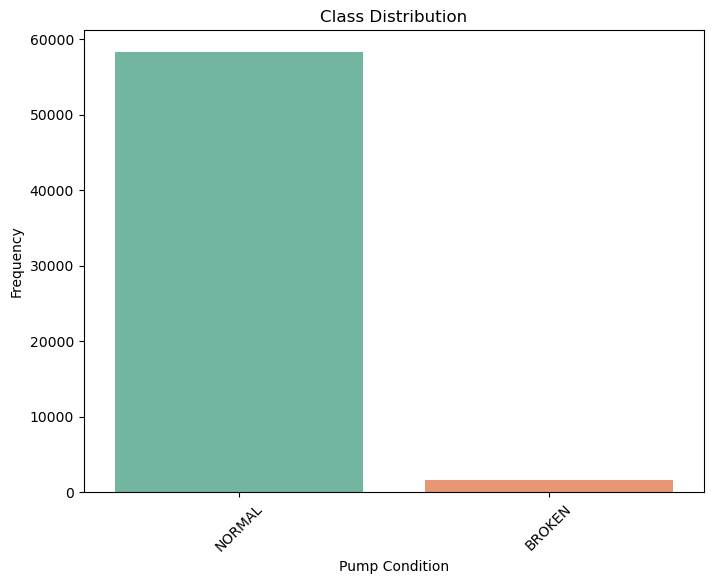

In [9]:
## Visualize

plt.figure(figsize=(8, 6))
sns.countplot(x='machine_status', data=df, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Pump Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [10]:
df.isnull().sum()

sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0
sensor_50         0


In [12]:
#df = df.drop(columns=['sensor_15', 'Unnamed: 0'])

In [98]:
df = df.dropna()

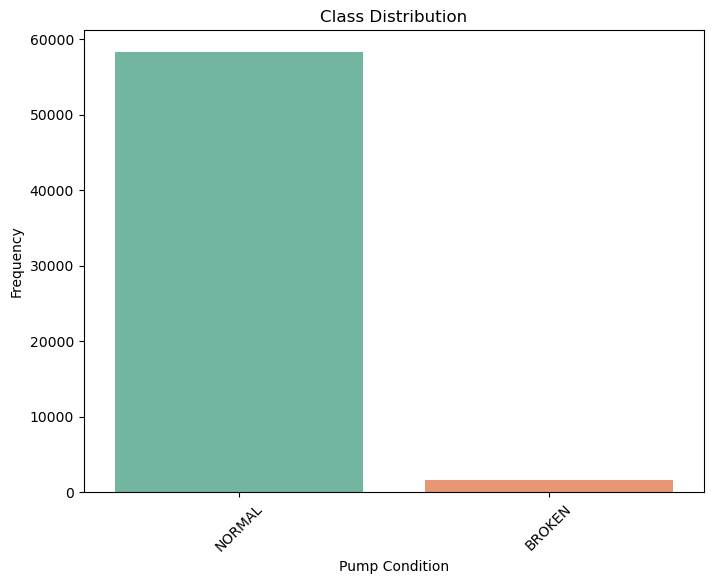

In [99]:
## Visualize

plt.figure(figsize=(8, 6))
sns.countplot(x='machine_status', data=df, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Pump Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, mean_squared_error

# Load your dataset
df = pd.read_csv('data_file_updated.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop unnecessary columns
# df = df.drop(columns=['sensor_15', 'Unnamed: 0'])

# Handle missing values
# df = df.dropna()

# Feature Engineering: Extract date and time components
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

# Optionally, you can use cyclical encoding for features like hour
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24.0)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24.0)

# Drop the original timestamp column
df = df.drop(columns=['timestamp'])

# Separate features and target
X = df.drop(columns=['machine_status'])
y = df['machine_status']

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

# Encode target variable for binary classification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)  # Convert to one-hot encoding

# Create sequences for LSTM
def create_sequences(data, target, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i+seq_length])
        y_seq.append(target[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

SEQ_LENGTH = 20
X_seq, y_seq = create_sequences(scaled_data, y_one_hot, SEQ_LENGTH)

# Define train_size
train_size = int(len(X_seq) * 0.8)  # 80% for training

# Split sequences into training and test sets
X_train_seq, X_test_seq = X_seq[:train_size], X_seq[train_size:]
y_train_seq, y_test_seq = y_seq[:train_size], y_seq[train_size:]

# Check shapes of training and test sets
print("X_train_seq shape:", X_train_seq.shape)
print("y_train_seq shape:", y_train_seq.shape)
print("X_test_seq shape:", X_test_seq.shape)
print("y_test_seq shape:", y_test_seq.shape)

# Build the LSTM model for binary classification
input_shape = (SEQ_LENGTH, X_train_seq.shape[2])
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=input_shape))
model.add(Dense(2, activation='softmax'))  # Output layer for binary classification
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_seq, y_train_seq, epochs=20, verbose=1)

# Make predictions
y_pred_seq = model.predict(X_test_seq)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred_seq, axis=1)

# Convert y_test_seq to class labels
y_test_labels = np.argmax(y_test_seq, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"LSTM Accuracy: {accuracy}")

# Compute MSE (optional)
mse_lstm = mean_squared_error(y_test_labels, y_pred_labels)
print(f"LSTM MSE: {mse_lstm}")


X_train_seq shape: (47870, 20, 59)
y_train_seq shape: (47870, 2)
X_test_seq shape: (11968, 20, 59)
y_test_seq shape: (11968, 2)
Epoch 1/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9937 - loss: 0.0608
Epoch 2/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9998 - loss: 0.1206
Epoch 3/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9999 - loss: 0.0012
Epoch 4/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9998 - loss: 9.8908e-04
Epoch 5/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9999 - loss: 0.0012
Epoch 6/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9999 - loss: 7.7417e-04
Epoch 7/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9998 - loss: 3.5352e-04
Epoch 8/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9999 - loss: 2.0277e-04
Epoch 9/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9999 - loss: 0.0168
Epoch 10/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, mean_squared_error

# Load your dataset
df = pd.read_csv('data_file_updated.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop unnecessary columns
# df = df.drop(columns=['sensor_15', 'Unnamed: 0'])

# Handle missing values
# df = df.dropna()

# Feature Engineering: Extract date and time components
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

# Optionally, you can use cyclical encoding for features like hour
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24.0)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24.0)

# Drop the original timestamp column
df = df.drop(columns=['timestamp'])

# Separate features and target
X = df.drop(columns=['machine_status'])
y = df['machine_status']

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

# Encode target variable for binary classification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)  # Convert to one-hot encoding

# Create sequences for LSTM
def create_sequences(data, target, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i+seq_length])
        y_seq.append(target[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

SEQ_LENGTH = 30
X_seq, y_seq = create_sequences(scaled_data, y_one_hot, SEQ_LENGTH)

# Define train_size
train_size = int(len(X_seq) * 0.8)  # 80% for training

# Split sequences into training and test sets
X_train_seq, X_test_seq = X_seq[:train_size], X_seq[train_size:]
y_train_seq, y_test_seq = y_seq[:train_size], y_seq[train_size:]

# Check shapes of training and test sets
print("X_train_seq shape:", X_train_seq.shape)
print("y_train_seq shape:", y_train_seq.shape)
print("X_test_seq shape:", X_test_seq.shape)
print("y_test_seq shape:", y_test_seq.shape)

# Build the LSTM model for binary classification
input_shape = (SEQ_LENGTH, X_train_seq.shape[2])
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=input_shape))
model.add(Dense(2, activation='softmax'))  # Output layer for binary classification
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_seq, y_train_seq, epochs=20, verbose=1)

# Make predictions
y_pred_seq = model.predict(X_test_seq)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred_seq, axis=1)

# Convert y_test_seq to class labels
y_test_labels = np.argmax(y_test_seq, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"LSTM Accuracy: {accuracy}")

# Compute MSE (optional)
mse_lstm = mean_squared_error(y_test_labels, y_pred_labels)
print(f"LSTM MSE: {mse_lstm}")


X_train_seq shape: (47862, 30, 59)
y_train_seq shape: (47862, 2)
X_test_seq shape: (11966, 30, 59)
y_test_seq shape: (11966, 2)
Epoch 1/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9940 - loss: 0.2064
Epoch 2/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9998 - loss: 0.0029
Epoch 3/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9999 - loss: 7.1354e-04
Epoch 4/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9999 - loss: 5.9795e-04
Epoch 5/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 1.0000 - loss: 3.6568e-04
Epoch 6/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9999 - loss: 0.0157
Epoch 7/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9998 - loss: 0.0029
Epoch 8/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 1.0000 - loss: 5.1896e-04
Epoch 9/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9999 - loss: 0.1670
Epoch 10/20
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, mean_squared_error

# Load your dataset
df = pd.read_csv('data_file_updated.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop unnecessary columns
# df = df.drop(columns=['sensor_15', 'Unnamed: 0'])

# Handle missing values
# df = df.dropna()

# Feature Engineering: Extract date and time components
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

# Optionally, you can use cyclical encoding for features like hour
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24.0)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24.0)

# Drop the original timestamp column
df = df.drop(columns=['timestamp'])

# Separate features and target
X = df.drop(columns=['machine_status'])
y = df['machine_status']

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

# Encode target variable for binary classification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)  # Convert to one-hot encoding

# Create sequences for LSTM
def create_sequences(data, target, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i+seq_length])
        y_seq.append(target[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

SEQ_LENGTH = 10
X_seq, y_seq = create_sequences(scaled_data, y_one_hot, SEQ_LENGTH)

# Define train_size
train_size = int(len(X_seq) * 0.8)  # 80% for training

# Split sequences into training and test sets
X_train_seq, X_test_seq = X_seq[:train_size], X_seq[train_size:]
y_train_seq, y_test_seq = y_seq[:train_size], y_seq[train_size:]

# Check shapes of training and test sets
print("X_train_seq shape:", X_train_seq.shape)
print("y_train_seq shape:", y_train_seq.shape)
print("X_test_seq shape:", X_test_seq.shape)
print("y_test_seq shape:", y_test_seq.shape)

# Build the LSTM model for binary classification
input_shape = (SEQ_LENGTH, X_train_seq.shape[2])
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=input_shape))
model.add(Dense(2, activation='softmax'))  # Output layer for binary classification
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_seq, y_train_seq, epochs=20, verbose=1)

# Make predictions
y_pred_seq = model.predict(X_test_seq)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred_seq, axis=1)

# Convert y_test_seq to class labels
y_test_labels = np.argmax(y_test_seq, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"LSTM Accuracy: {accuracy}")

# Compute MSE (optional)
mse_lstm = mean_squared_error(y_test_labels, y_pred_labels)
print(f"LSTM MSE: {mse_lstm}")


X_train_seq shape: (47878, 10, 59)
y_train_seq shape: (47878, 2)
X_test_seq shape: (11970, 10, 59)
y_test_seq shape: (11970, 2)
Epoch 1/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9994 - loss: 0.0221
Epoch 2/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9999 - loss: 7.3770e-04
Epoch 3/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9999 - loss: 1.3622e-04
Epoch 4/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9999 - loss: 1.7831e-04
Epoch 5/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 1.0000 - loss: 1.0248e-04
Epoch 6/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9999 - loss: 2.4623e-04
Epoch 7/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9998 - loss: 2.2104e-04
Epoch 8/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9999 - loss: 1.0258e-04
Epoch 9/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9999 - loss: 1.0453e-04
Epoch 10/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 5s 4m

In [ ]:
## Random Forest Classifier 

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
df = pd.read_csv('data_file_updated.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop unnecessary columns
# df = df.drop(columns=['sensor_15', 'Unnamed: 0'])

# Handle missing values
# df = df.dropna()

# Feature Engineering: Extract date and time components
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

# Optionally, you can use cyclical encoding for features like hour
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24.0)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24.0)

# Drop the original timestamp column
df = df.drop(columns=['timestamp'])

# Separate features and target
X = df.drop(columns=['machine_status'])
y = df['machine_status']

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encode target variable for binary classification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

# Print classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)


Random Forest Accuracy: 0.9998329435349148
Classification Report:
              precision    recall  f1-score   support

      BROKEN       1.00      0.99      1.00       348
      NORMAL       1.00      1.00      1.00     11624

    accuracy                           1.00     11972
   macro avg       1.00      1.00      1.00     11972
weighted avg       1.00      1.00      1.00     11972



In [ ]:
## Feature Engineering Method

In [14]:
# Extract feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to view feature importances
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
      Feature    Importance
0   sensor_00  1.537500e-01
2   sensor_02  1.339969e-01
5   sensor_05  1.295640e-01
1   sensor_01  1.075071e-01
10  sensor_10  6.750942e-02
11  sensor_11  6.417407e-02
12  sensor_12  5.651744e-02
47  sensor_48  4.589569e-02
4   sensor_04  3.669713e-02
37  sensor_38  3.129302e-02
6   sensor_06  2.886413e-02
48  sensor_49  2.772164e-02
13  sensor_13  2.740122e-02
39  sensor_40  1.965539e-02
50  sensor_51  1.693196e-02
8   sensor_08  1.510947e-02
3   sensor_03  6.877015e-03
45  sensor_46  5.114093e-03
49  sensor_50  3.744019e-03
58   hour_cos  3.666593e-03
46  sensor_47  2.257258e-03
38  sensor_39  2.103178e-03
42  sensor_43  1.826191e-03
22  sensor_23  1.824785e-03
44  sensor_45  1.281915e-03
54       hour  1.063248e-03
43  sensor_44  1.000845e-03
7   sensor_07  8.689309e-04
41  sensor_42  7.647356e-04
40  sensor_41  7.440579e-04
25  sensor_26  7.410779e-04
57   hour_sin  6.113897e-04
35  sensor_36  5.201393e-04
34  sensor_35  4.153525e-04

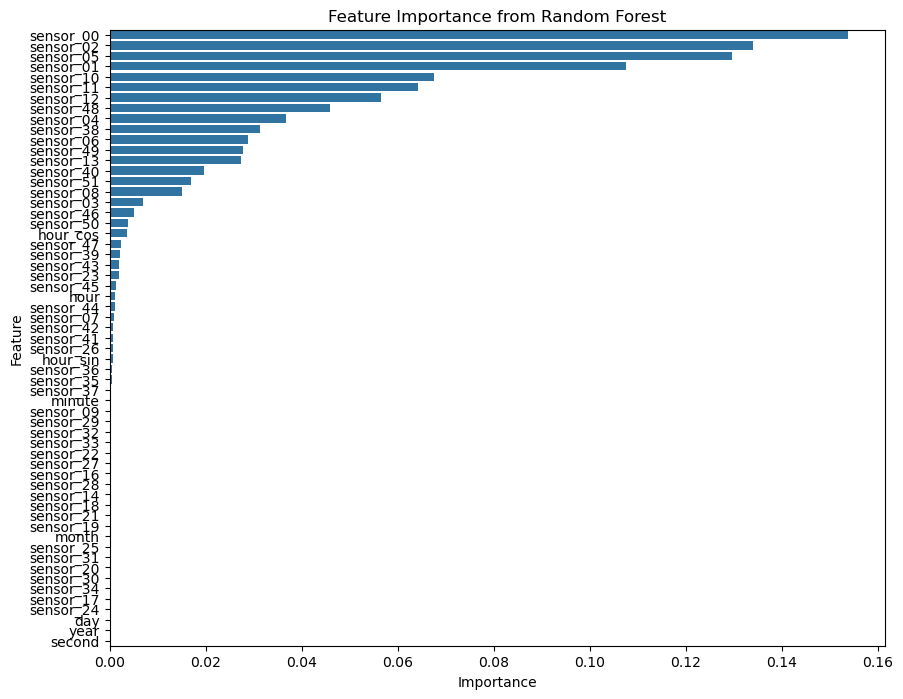

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
## XGB Model

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Load your dataset
df = pd.read_csv('data_file_updated.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop unnecessary columns
# df = df.drop(columns=['sensor_15', 'Unnamed: 0'])

# Handle missing values
# df = df.dropna()

# Feature Engineering: Extract date and time components
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

# Optionally, you can use cyclical encoding for features like hour
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24.0)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24.0)

# Drop the original timestamp column
df = df.drop(columns=['timestamp'])

# Separate features and target
X = df.drop(columns=['machine_status'])
y = df['machine_status']

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encode target variable for binary classification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")

# Print classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)


XGBoost Accuracy: 0.9997494153023722
Classification Report:
              precision    recall  f1-score   support

      BROKEN       1.00      0.99      1.00       348
      NORMAL       1.00      1.00      1.00     11624

    accuracy                           1.00     11972
   macro avg       1.00      1.00      1.00     11972
weighted avg       1.00      1.00      1.00     11972



In [ ]:
## LGBM

In [28]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 960.0 kB/s eta 0:00:02
   --------------- ------------------------ 0.5/1.4 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 13.0 MB/s eta 0:00:00


In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb

# Load your dataset
df = pd.read_csv('data_file_updated.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop unnecessary columns
# df = df.drop(columns=['sensor_15', 'Unnamed: 0'])

# Handle missing values
# df = df.dropna()

# Feature Engineering: Extract date and time components
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

# Optionally, you can use cyclical encoding for features like hour
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24.0)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24.0)

# Drop the original timestamp column
df = df.drop(columns=['timestamp'])

# Separate features and target
X = df.drop(columns=['machine_status'])
y = df['machine_status']

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encode target variable for binary classification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"LightGBM Accuracy: {accuracy}")

# Print classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)


[LightGBM] [Info] Number of positive: 46646, number of negative: 1240
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12412
[LightGBM] [Info] Number of data points in the train set: 47886, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.974105 -> initscore=3.627476
[LightGBM] [Info] Start training from score 3.627476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [ ]:
# Save the trained model to a file
model.save('lstm_model.h5')